In [109]:
import os
from scipy import optimize
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/mac/Desktop/AI/IMP2_97110411/diabetes.csv',header = 0, encoding = 'ascii', engine = 'python')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [110]:
filename = '/Users/mac/Desktop/AI/IMP2_97110411/diabetes.csv'
data = pd.read_csv(filename)
print (data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [111]:
# Define the calculate entropy function
def calculate_entropy(df_label):
    classes,class_counts = np.unique(df_label,return_counts = True)
    entropy_value = np.sum([(-class_counts[i]/np.sum(class_counts))*np.log2(class_counts[i]/np.sum(class_counts)) 
                        for i in range(len(classes))])
    return entropy_value

In [112]:
# Define the calculate information gain function
def calculate_information_gain(dataset,feature,label): 
    # Calculate the dataset entropy
    dataset_entropy = calculate_entropy(dataset[label])   
    values,feat_counts= np.unique(dataset[feature],return_counts=True)
    
    # Calculate the weighted feature entropy                                # Call the calculate_entropy function
    weighted_feature_entropy = np.sum([(feat_counts[i]/np.sum(feat_counts))*calculate_entropy(dataset.where(dataset[feature]
                              ==values[i]).dropna()[label]) for i in range(len(values))])    
    feature_info_gain = dataset_entropy - weighted_feature_entropy
    return feature_info_gain

In [113]:
features = df.columns[:-1]
label = 'diabetes'
parent = None
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

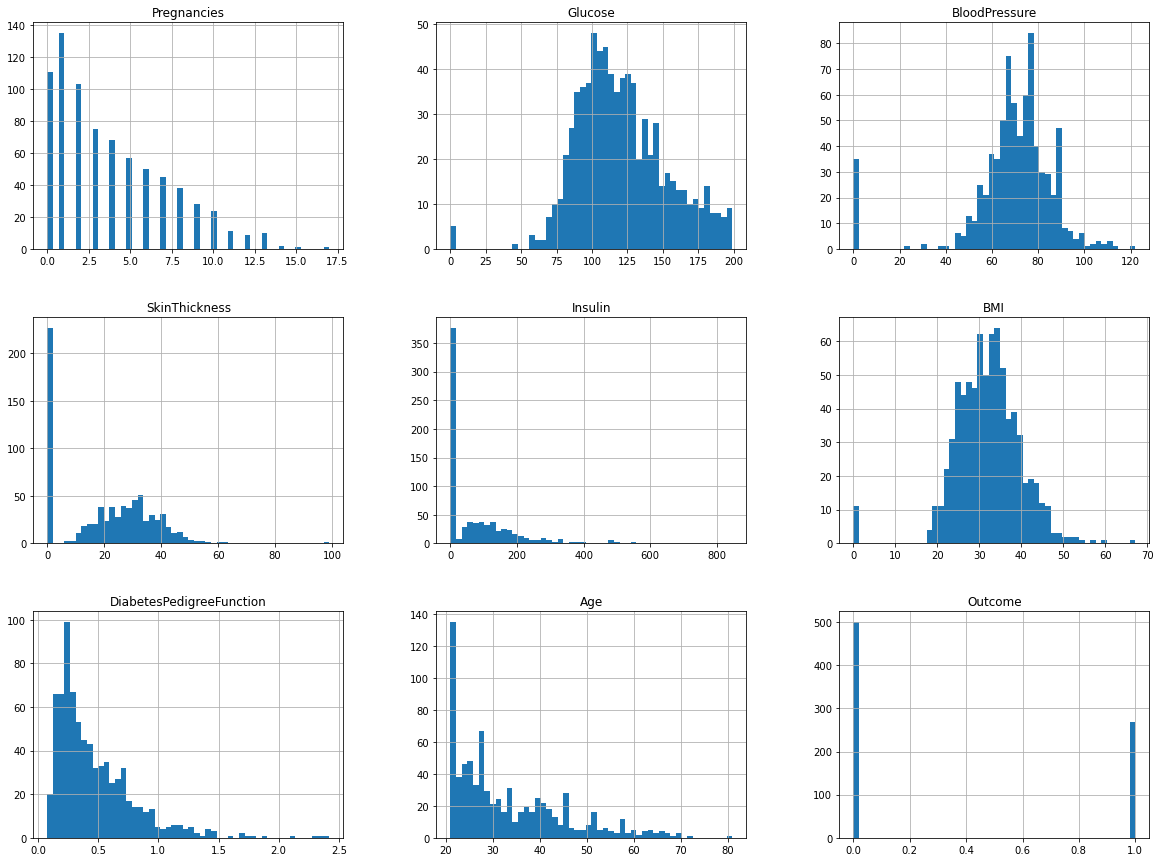

In [114]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [115]:
median_bmi = df['BMI'].median()
mean_bmi = df['BMI'].mean()
print("The median BMI is :",median_bmi)
print("The mean BMI is :",mean_bmi)

The median BMI is : 32.0
The mean BMI is : 31.992578124999977


In [116]:
median_bp = df['BloodPressure'].median()
mean_bp = df['BloodPressure'].mean()
print('Median Blood Pressure is:',median_bp)
print('Mean Blood Preddure is :',mean_bp)

Median Blood Pressure is: 72.0
Mean Blood Preddure is : 69.10546875


In [117]:
median_insulin = df['Insulin'].median()
mean_insulin = df['Insulin'].mean()
print('Median Insulin is:',median_insulin)
print('Mean Insulin is :',mean_insulin)

Median Insulin is: 30.5
Mean Insulin is : 79.79947916666667


In [118]:
median_skin = df['SkinThickness'].median()
mean_skin = df['SkinThickness'].mean()
print('Median Skin Thickness is:',median_skin)
print('Mean SkinThickness is :',mean_skin)

Median Skin Thickness is: 23.0
Mean SkinThickness is : 20.536458333333332


In [119]:
median_preg = df['Pregnancies'].median()
mean_preg = df['Pregnancies'].mean()
print('Median Pregnancy is:',median_preg)
print('Mean Pregnancy is :',mean_preg)

Median Pregnancy is: 3.0
Mean Pregnancy is : 3.8450520833333335


In [120]:
median_age = df['Age'].median()
mean_age = df['Age'].mean()
print('Median Age is:',median_age)
print('Mean Age is :',mean_age)

Median Age is: 29.0
Mean Age is : 33.240885416666664


In [121]:
median_glucose = df['Glucose'].median()
mean_glucose = df['Glucose'].mean()
print('Median Glucose is:',median_glucose)
print('Mean Glucose is :',mean_glucose)

Median Glucose is: 117.0
Mean Glucose is : 120.89453125


In [122]:
median_DiabetesPedigreeFunction = df['DiabetesPedigreeFunction'].median()
mean_DiabetesPedigreeFunction = df['DiabetesPedigreeFunction'].mean()
print('Median DiabetesPedigreeFunction is:',median_DiabetesPedigreeFunction)
print('Mean DiabetesPedigreeFunction is :',mean_DiabetesPedigreeFunction)

Median DiabetesPedigreeFunction is: 0.3725
Mean DiabetesPedigreeFunction is : 0.4718763020833327


In [123]:
df['BMI'] = df['BMI'].replace(
    to_replace=0, value = median_bmi)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(
    to_replace=0, value = median_DiabetesPedigreeFunction)
df['Glucose'] = df['Glucose'].replace(
    to_replace=0, value = median_glucose)
df['Age'] = df['Age'].replace(
    to_replace=0, value = median_age)
df['Pregnancies'] = df['Pregnancies'].replace(
    to_replace=0, value = median_preg)
df['SkinThickness'] = df['SkinThickness'].replace(
    to_replace=0, value = median_skin)
df['Insulin'] = df['Insulin'].replace(
    to_replace=0, value = median_insulin)
df['BloodPressure'] = df['BloodPressure'].replace(
    to_replace=0, value = median_bp)

In [124]:
train, test = train_test_split(df, test_size = 0.4, random_state=30)
target = train["Outcome"]
feature = train[train.columns[0:8]]
feat_names = train.columns[0:8]
target_classes = ['0','1'] 
print(test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
226            3      101             76             23     30.5  35.7   
610            3      106             54             21    158.0  30.9   
505           10       75             82             23     30.5  33.3   
470            1      144             82             40     30.5  41.3   
474            4      114             64             23     30.5  28.9   
..           ...      ...            ...            ...      ...   ...   
508            2       84             50             23     76.0  30.4   
382            1      109             60              8    182.0  25.4   
26             7      147             76             23     30.5  39.4   
502            6      117             68             41     30.5  39.0   
676            9      156             86             23     30.5  24.8   

     DiabetesPedigreeFunction  Age  Outcome  
226                     0.198   26        0  
610                

In [125]:
from sklearn.neighbors import KNeighborsClassifier
test_input=test[test.columns[0:8]]
expected = test["Outcome"]
neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(feature,target)
TrueDecisionpredicted = neigh.predict(test_input)
print(metrics.classification_report(expected, TrueDecisionpredicted))
print(metrics.confusion_matrix(expected, TrueDecisionpredicted))
print("TrueDecision accuracy: ",neigh.score(test_input,expected))
TrueDecisionscore=neigh.score(test_input,expected)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       206
           1       0.61      0.59      0.60       102

    accuracy                           0.74       308
   macro avg       0.71      0.70      0.70       308
weighted avg       0.74      0.74      0.74       308

[[168  38]
 [ 42  60]]
TrueDecision accuracy:  0.7402597402597403


In [126]:
import graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
print(dot_data)
Image(graph.create_png())
